# Titanic Survival Prediction

### 학번(이름) : 2025254011(김완수)

패턴인식 2주차 실습
- 본 실습은 Kaggle의 "Titanic - Machine Learning from Disaster"에서 제공하는 데이터셋을 활용합니다.
- 실습 목표 : 주어진 csv 파일을 활용하여 전통적 머신러닝 기법을 적용하여 Survival 여부를 판단

> Kaggle의 [Titanic - Macnine Leraning from Disaster](https://www.kaggle.com/competitions/titanic/data) 사이트에서 데이터 셋을 다운로드합니다.
> 데이터 셋은 gender_submission.csv, test.csv, train.csv로 구성되어 있습니다.


# 🚢 Titanic - Machine Learning from Disaster 데이터셋 개요
- 주제: 타이타닉호 침몰 당시 어떤 승객이 생존했는지를 예측하는 문제
- 목표: 주어진 승객의 특성(나이, 성별, 객실 등)을 바탕으로 **생존 여부(Survived)**를 분류
- 타깃 변수: Survived (0 = 사망, 1 = 생존)


## 🎯 학습 목표
- 판다스(Pandas)를 활용하여 데이터 로드
- 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
- Feature Engineering
- 머신러닝 모델 탐색 및 학습
- 생각해보기!
  + 특징(Feature)가 많을수록 성능이 좋아지는가?
  + 모든 특징들이 작업(분류) 수행에 유의미한가? 도움이되는가?



## 📦 필요 패키지
- `pandas`, `numpy`, `scikit-learn`, `matplotlib`
- `tensorflow` (딥러닝)


In [1]:
import warnings

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", category=FutureWarning)


## 1) 판다스(Pandas)를 활용하여 데이터 로드
- Kaggle의 [Titanic - Macnine Leraning from Disaster](https://www.kaggle.com/competitions/titanic/data) 사이트에서 데이터 셋을 다운로드
- titanic 폴더에 압축 해제
- 판다스를 활용하여 train, test 데이터 셋 로드

| 변수명           | 의미                                                     | 타입  | 예시                 |
| ------------- | ------------------------------------------------------ | --- | ------------------ |
| `PassengerId` | 승객 고유 번호                                               | 정수형 | 892                |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                                 | 범주형 | 0                  |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                      | 범주형 | 3                  |
| `Name`        | 이름                                                     | 문자열 | "Kelly, Mr. James" |
| `Sex`         | 성별                                                     | 범주형 | male / female      |
| `Age`         | 나이                                                     | 실수형 | 22                 |
| `SibSp`       | 함께 탑승한 형제자매/배우자 수                                      | 정수형 | 1                  |
| `Parch`       | 함께 탑승한 부모/자녀 수                                         | 정수형 | 0                  |
| `Ticket`      | 티켓 번호                                                  | 문자열 | "STON/O2. 3101282" |
| `Fare`        | 요금                                                     | 실수형 | 7.25               |
| `Cabin`       | 객실 번호                                                  | 문자열 | C85                |
| `Embarked`    | 승선 항구 (C = Cherbourg, Q = Queenstown, S = Southampton) | 범주형 | S                  |



In [2]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load datasets (titanic 폴더에 있는 파일들)
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
submission = pd.read_csv("titanic/gender_submission.csv")

print("Training data shape:", train.shape)
print("Test data shape:", test.shape)
print("현재 작업 디렉토리:", os.getcwd())
train.head()


Training data shape: (891, 12)
Test data shape: (418, 11)
현재 작업 디렉토리: /Users/zzangdol/PycharmProjects/zzangdol/pattern


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# matplotlib font issue resolution
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Find available Korean fonts
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if any(keyword in f.lower() for keyword in ['apple', 'nanum', 'malgun', 'gothic', 'dotum'])]
print("Available Korean fonts:", korean_fonts[:5])

# Set font to available Korean font
if 'Apple SD Gothic Neo' in korean_fonts:
    selected_font = 'Apple SD Gothic Neo'
elif 'Nanum Myeongjo' in korean_fonts:
    selected_font = 'Nanum Myeongjo'
elif 'AppleGothic' in korean_fonts:
    selected_font = 'AppleGothic'
else:
    selected_font = korean_fonts[0] if korean_fonts else 'DejaVu Sans'

print(f"Selected font: {selected_font}")

# Apply font settings
plt.rcParams['font.family'] = selected_font
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = selected_font
mpl.rcParams['axes.unicode_minus'] = False

# seaborn settings
sns.set_style("whitegrid")
sns.set_palette("husl")

print("Font settings applied successfully!")

Available Korean fonts: ['Apple SD Gothic Neo', 'Tsukushi A Round Gothic', 'Nanum Myeongjo', 'Hiragino Maru Gothic Pro', 'BIZ UDGothic']
Selected font: Apple SD Gothic Neo
Font settings applied successfully!



## 2) 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
- 모델 개발 전 데이터 분석
- 문자열 데이터 (Name, Ticket, Cabin) 제외 -> 분석에 큰 영향 없음

#### 데이터 구조 확인

In [4]:
print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns) # target 인 Survived 없음

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Survived (Target Variable) 분포 확인

<Axes: ylabel='count'>

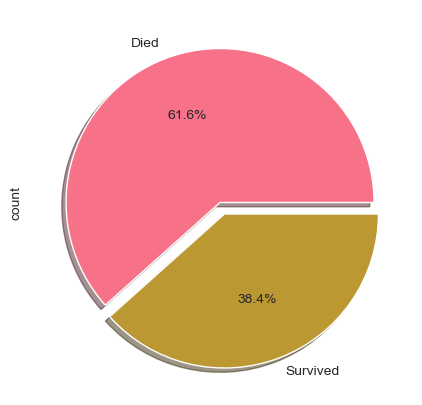

In [5]:
# Survival ratio check
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['Died', 'Survived']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels)

- 사망 비율은 61.6%, 생존 비율은 38.4%로 사망한 탑승객의 수가 더 많음

#### 성별 (Sex)

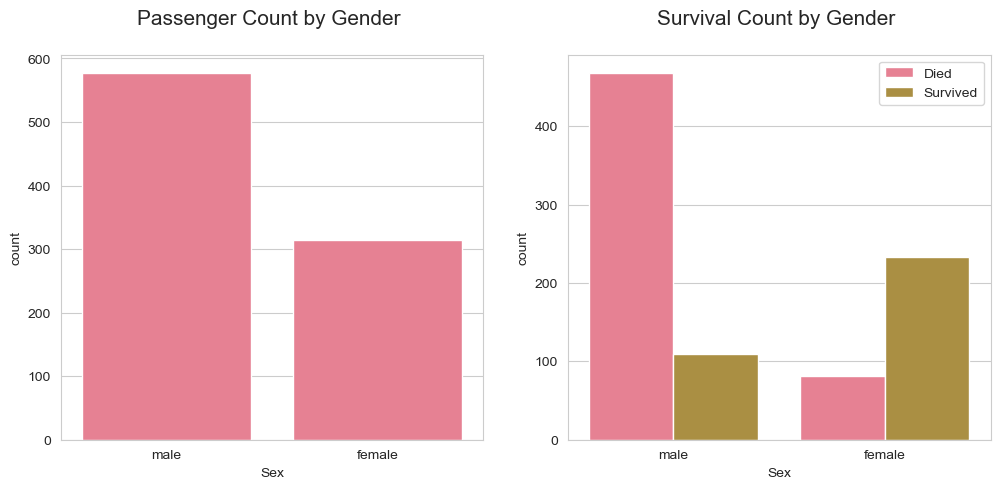

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Passenger Count by Gender \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("Survival Count by Gender \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['Died', 'Survived'])

- 남성의 탑승자 수가 더 많지만 여성의 생존자 수가 더 많음

,Survived
Sex,
female,0.742038
male,0.188908


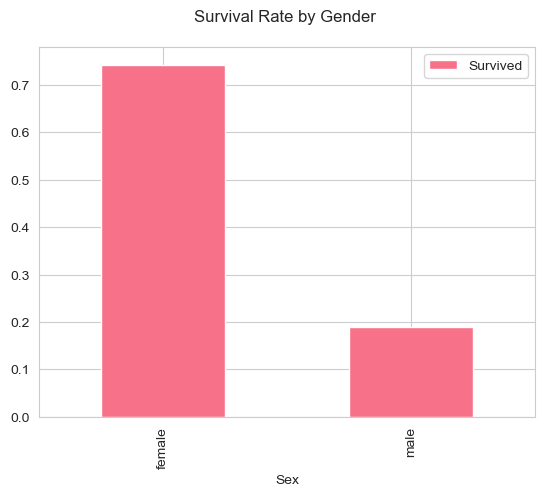

In [7]:
# Survival rate by gender
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("Survival Rate by Gender \n")
train[['Sex', 'Survived']].groupby('Sex').mean()

- 여성의 생존률이 74.2%로 남성의 18.9%보다 훨씬 높음
- 여성과 어린이가 먼저 구명정에 탑승한 '여성 및 어린이 우선' 정책의 영향으로 추정
- 성별이 생존에 중요한 영향을 미치는 변수임을 알 수 있음

#### 티켓 등급 (Pclass)

In [8]:
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- 1등석의 생존률이 62.9%로 3등석의 24.2%보다 훨씬 높음
- 부유층이 우선적으로 구명정에 탑승했을 가능성
- 객실 등급이 생존에 중요한 영향을 미치는 변수임을 알 수 있음

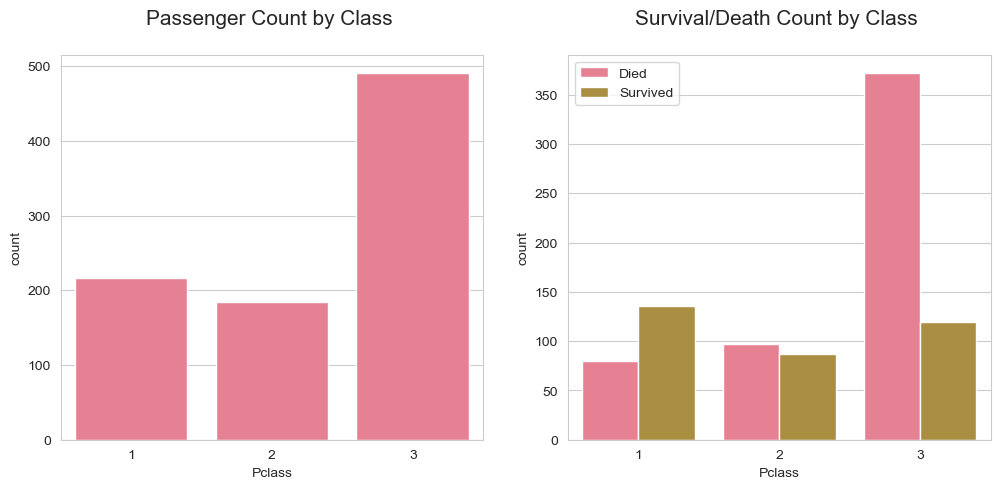

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Passenger Count by Class \n", size=15)
sns.countplot(data=train, x='Pclass', ax=axes[0])

axes[1].set_title("Survival/Death Count by Class \n", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['Died', 'Survived'])

- 1등석의 탑승자 수가 가장 적지만 생존자 수는 가장 많음

#### 나이 (Age)

In [10]:
print(train['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

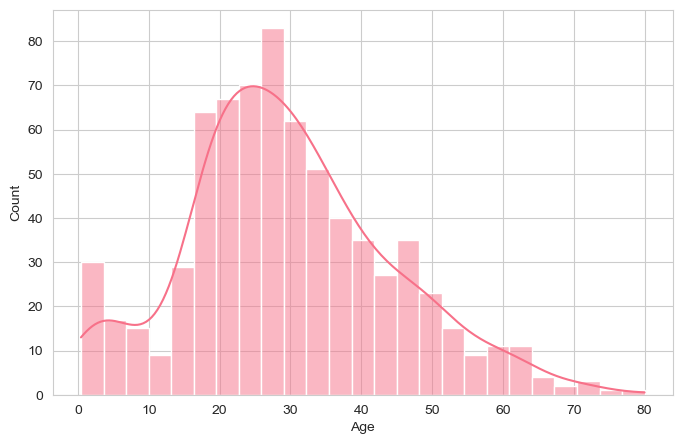

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Age'], bins=25, kde=True)

- 탑승객의 나이는 0.42세부터 80세까지 다양
- 평균 나이는 약 29.7세, 중앙값은 약 28세로 비교적 젊은 층이 많음

<Axes: xlabel='Age', ylabel='Count'>

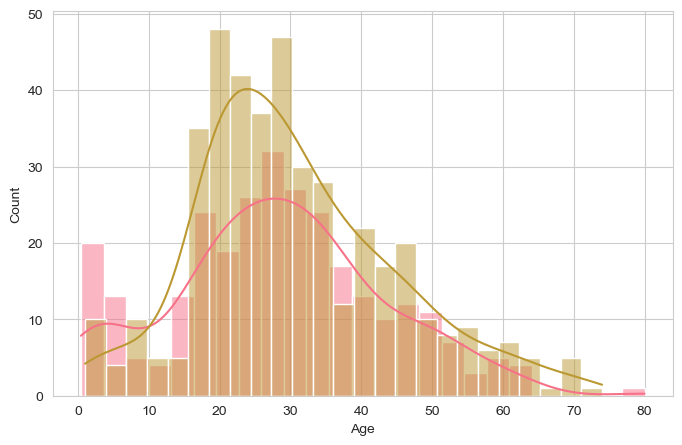

In [12]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.histplot(sur['Age'], bins=25, kde=True)
sns.histplot(dead['Age'], bins=25, kde=True)

- 생존자와 사망자의 나이 분포는 비슷
- 다만 생존자 중 0~10세 어린이의 비율이 상대적으로 높음
- 어린이가 생존에 유리한 변수임을 알 수 있음

#### 함께 탑승한 가족 수 (SibSp, Parch)
- SibSp: 함께 탑승한 형제자매/배우자 수
- Parch: 함께 탑승한 부모/자녀 수

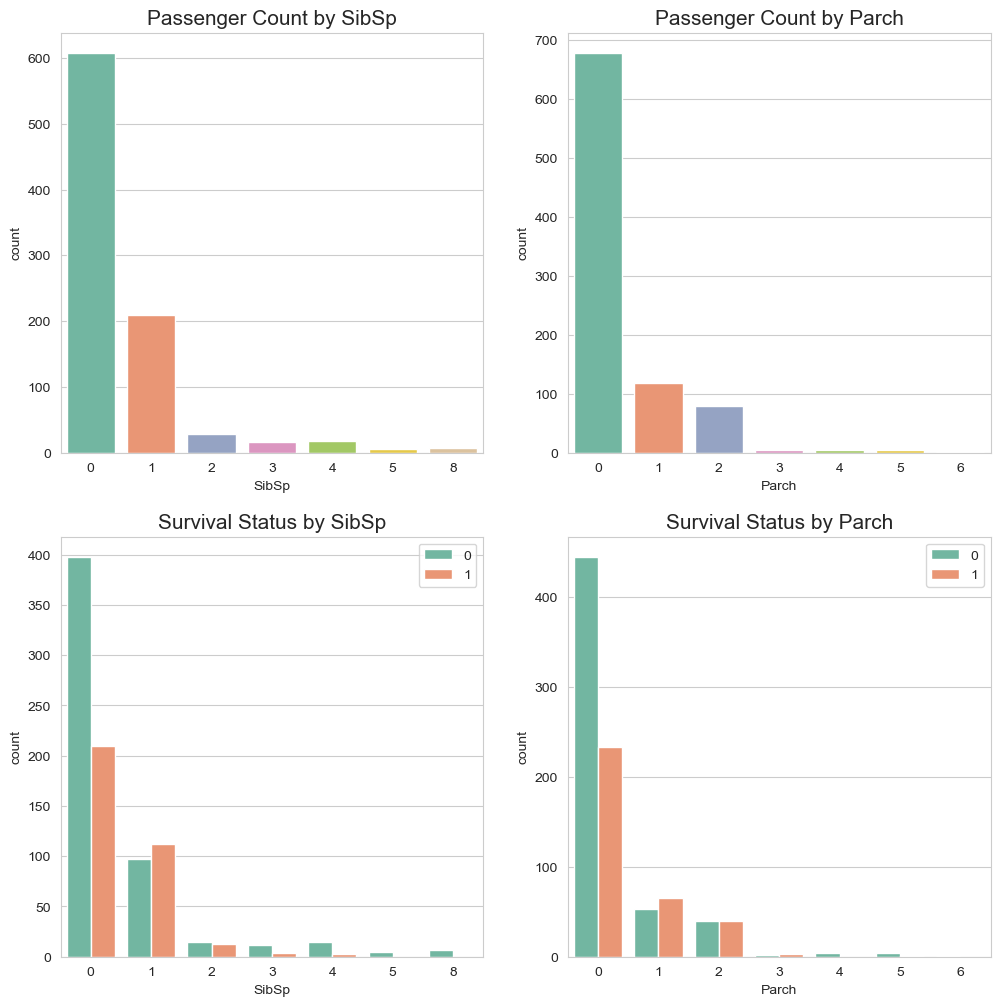

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("Passenger Count by SibSp", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("Passenger Count by Parch", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")

axes[1][0].set_title("Survival Status by SibSp", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("Survival Status by Parch", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

<Axes: xlabel='Parch'>

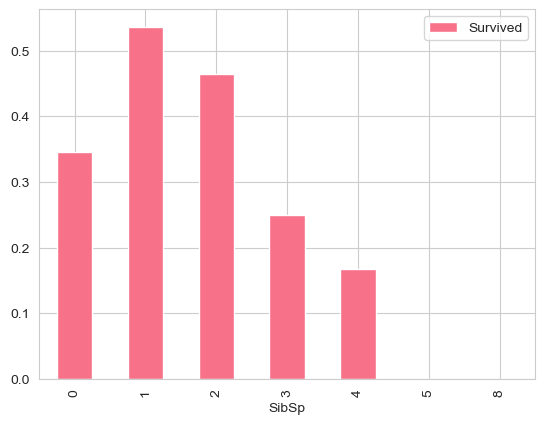

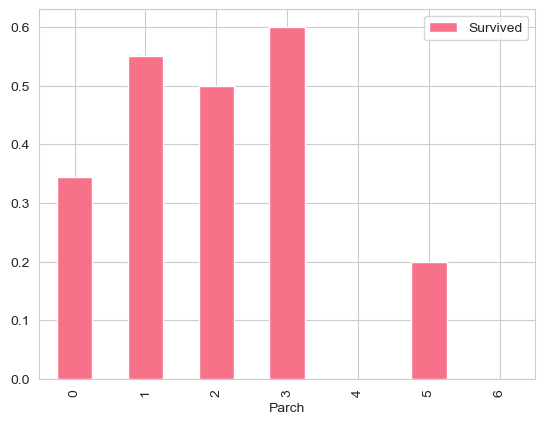

In [14]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar()
train[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar()

- 함께 탑승한 가족 수가 1~3명인 경우 생존률이 높음
- 혼자 탑승한 경우(0명)나 가족이 많은 경우(4명 이상)는 생존률이 낮음
- 적당한 가족 수가 생존에 유리한 변수임을 알 수 있음
- 혼자 탑승한 경우는 긴급 상황에서 도움을 받기 어려웠을 가능성
- 가족이 많은 경우는 구명정 탑승 경쟁에서 불리했을 가능성

#### 탑승 항구 (Embarked)

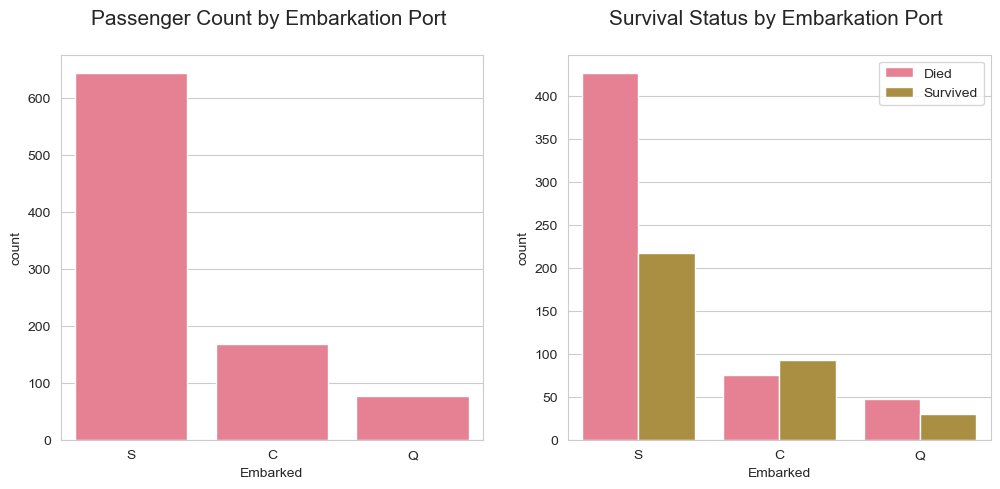

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Passenger Count by Embarkation Port \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("Survival Status by Embarkation Port \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['Died', 'Survived'])

<Axes: xlabel='Embarked'>

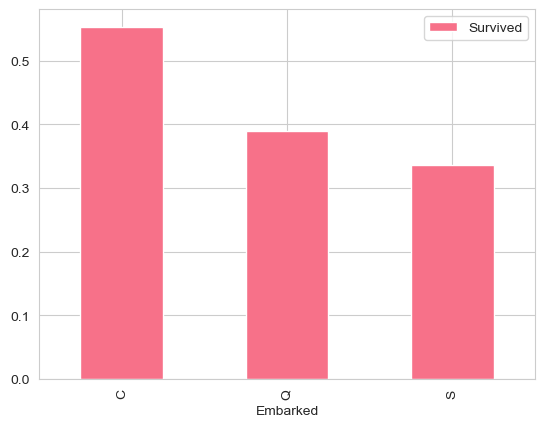

In [16]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

- S(사우스햄튼) 항구에서 탑승한 승객이 가장 많음
- C(셰르부르) 항구에서 탑승한 승객의 생존률이 55.4%로 가장 높음
- E(퀸스타운) 항구에서 탑승한 승객의 생존률이 38.9%로 중간
- S(사우스햄튼) 항구에서 탑승한 승객의 생존률이 33.7%로 가장 낮음

<Axes: >

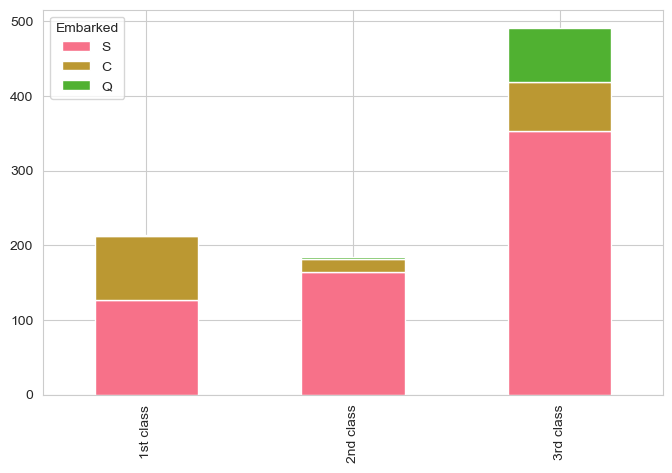

In [17]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

- 1등석은 C(셰르부르) 항구에서, 3등석은 S(사우스햄튼) 항구에서 주로 탑승
- 객실 등급과 탑승 항구가 상관관계가 있음을 알 수 있음

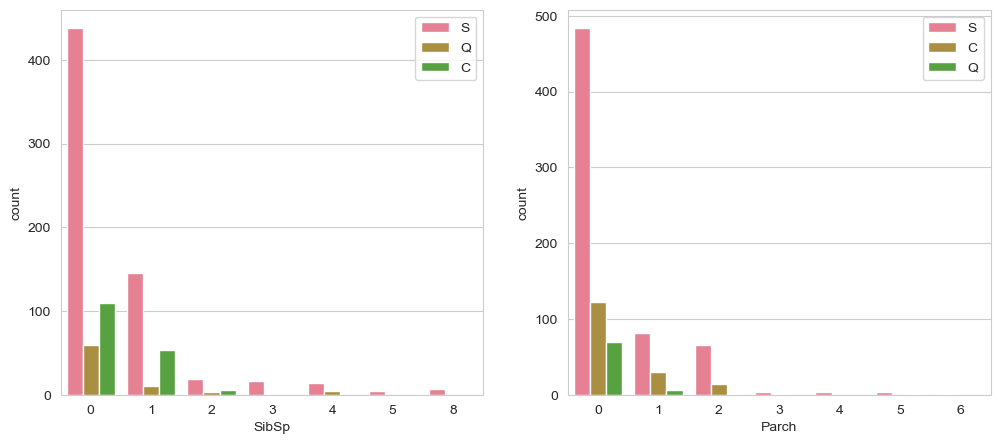

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

- 함께 탑승한 가족 수와 탑승 항구가 상관관계가 있음을 알 수 있음
- S(사우스햄튼) 항구에서 탑승한 승객은 혼자 탑승한 경우가 많음
- C(셰르부르) 항구에서 탑승한 승객은 함께 탑승한 가족 수가 많은 경우가 많음

#### 요금 (Fare)

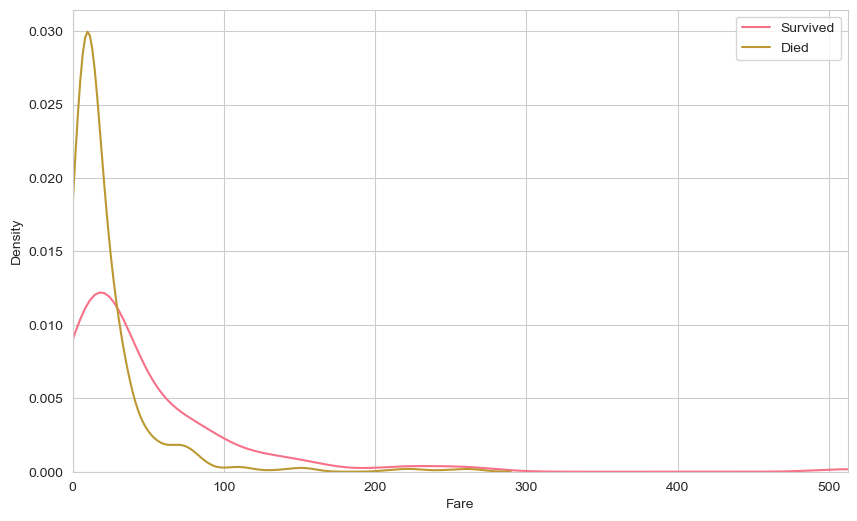

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

# Distribution check
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)

# Axis range
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['Survived', 'Died'])

plt.show()

- 생존자와 사망자의 요금 분포는 비슷
- 다만 생존자 중 요금이 높은 승객의 비율이 상대적으로 높음

r
## 3) Feature Engineering
- 머신러닝 모델에 적합한 형태로 데이터 전처리
- 결측치 처리, 범주형 변수 인코딩, 관계없는 변수제거 등

#### 결측치 처리

<Axes: >

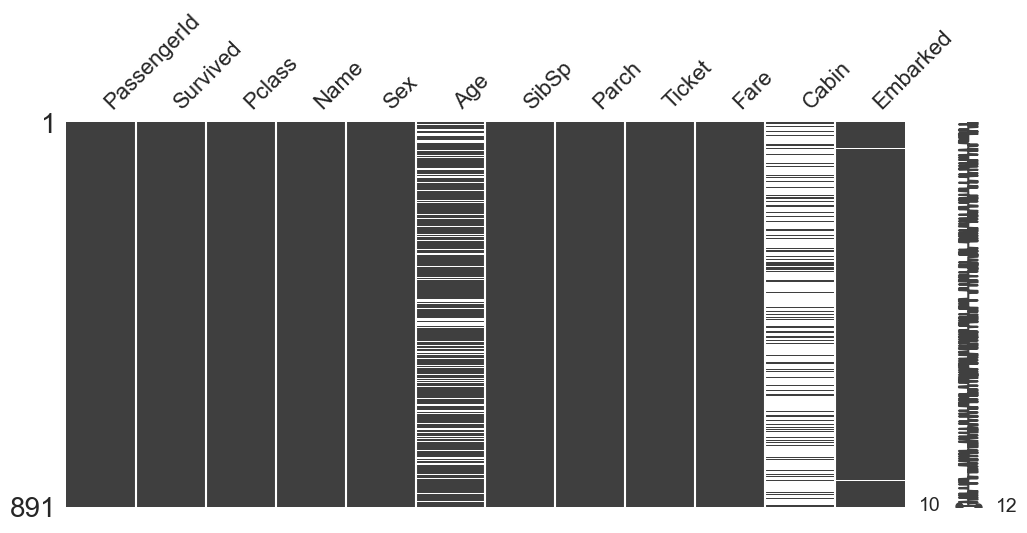

In [20]:
# 결측치 시각화
import missingno as msno
msno.matrix(train, figsize=(12, 5))

##### 나이 (Age) 결측치 처리
- 나이(Age) 변수에 결측치가 177개(약 20%) 존재
- 나이의 중앙값(28세)으로 대체
- 나이는 생존에 중요한 영향을 미치는 변수이므로 결측치를 제거하지 않고 대체
- 나이의 분포가 왜곡되어 있으므로 평균보다는 중앙값으로 대체
- 나이의 결측치가 많으므로 나이 그룹(AgeGroup) 변수를 새로 생성하여 보완
- 나이 그룹은 0\~10, 10\~20, ..., 70\~80, 80 이상으로 구분
- 나이 그룹은 범주형 변수로 인코딩

In [21]:
def fe_age(orig_df):
    df = orig_df.copy()
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=False)
    df['AgeGroup'] = df['AgeGroup'].astype('category')
    df.drop(columns=['Age'], inplace=True)
    return df

result = fe_age(train)

print(train['Age'])
print(result['AgeGroup'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: AgeGroup, Length: 891, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


##### 객실번호 (Cabin) 결측치 처리
- 객실번호(Cabin) 변수에 결측치가 687개(약 77%) 존재
- 객실번호의 첫 글자만 추출하여 새로운 변수로 생성
- 객실번호(Cabin) 변수는 범주형 변수로 인코딩
- 객실번호(Cabin) 변수의 결측치는 'U'로 대체 (Unknown)

In [22]:
def fe_cabin(orig_df):
    df = orig_df.copy()
    df['Cabin'].fillna('U', inplace=True)
    df['Cabin'] = df['Cabin'].str[0]
    df['Cabin'] = df['Cabin'].astype('category').cat.codes
    return df

result = fe_cabin(train)

print(train['Cabin'])
print(result['Cabin'])

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object
0      8
1      2
2      8
3      2
4      8
      ..
886    8
887    1
888    8
889    2
890    8
Name: Cabin, Length: 891, dtype: int8


##### 승선항구 (Embarked) 결측치 처리
- 승선항구(Embarked) 변수에 결측치가 2개 존재
- 승선항구의 최빈값('S')으로 대체
- 승선항구(Embarked) 변수는 범주형 변수로 인코딩

In [23]:
def fe_embarked(orig_df):
    df = orig_df.copy()
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Embarked'] = df['Embarked'].astype('category').cat.codes
    return df

result = fe_embarked(train)

print(train['Embarked'])
print(result['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int8


##### 요금(Fare) 결측치 처리
- 요금(Fare) 변수에 결측치가 1개 존재 (test 데이터셋)
- 요금의 중앙값으로 대체
- 요금(Fare) 변수는 범주형 변수로 인코딩

In [24]:
def fe_fare(orig_df):
    df = orig_df.copy()
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Fare'] = pd.qcut(df['Fare'], 4, labels=False)  # 사분위수로 구간 나누기
    df['Fare'] = df['Fare'].astype('category')
    return df

result = fe_fare(train)

print(train['Fare'])
print(result['Fare'])

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: category
Categories (4, int64): [0, 1, 2, 3]


#### 범주형 변수 인코딩

##### 성별 (Sex) 변수 인코딩
- 성별은 문자열 데이터이므로 0과 1로 인코딩

In [25]:
def fe_sex(orig_df):
    df = orig_df.copy()
    df['Sex'] = df['Sex'].astype('category').cat.codes
    return df

result = fe_sex(train)

print(train['Sex'])
print(result['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int8


##### 이름 (Name) 변수 인코딩
- 이름에서 호칭(Title)만 추출하여 새로운 변수로 생성
- 호칭(Title) 변수는 범주형 변수로 인코딩

In [26]:
def fe_name(orig_df):
    df = orig_df.copy()
    df['Name'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Name'] = df['Name'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')

    df['Name'] = df['Name'].astype('category').cat.codes
    return df

result = fe_name(train)

print(train['Name'])
print(result['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Name, Length: 891, dtype: int8


##### 가족 규모 (FamilySize) 변수 생성
- 가족 규모(FamilySize) = 함께 탑승한 형제자매/배우자 수(SibSp) + 함께 탑승한 부모/자녀 수(Parch) + 1(본인)
- 가족 규모(FamilySize) 변수는 정수형 변수로 사용

In [27]:
def fe_family_size(orig_df):
    df = orig_df.copy()
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df.drop(columns=['SibSp', 'Parch'], inplace=True)
    return df

result = fe_family_size(train)

print(train[['SibSp', 'Parch']])
print(result['FamilySize'])

     SibSp  Parch
0        1      0
1        1      0
2        0      0
3        1      0
4        0      0
..     ...    ...
886      0      0
887      0      0
888      1      2
889      0      0
890      0      0

[891 rows x 2 columns]
0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


#### 불필요한 변수 제거
- PassengerId: 단순 식별자, 모델에 영향 없음
- Ticket: 티켓 번호, 모델에 영향 없음
- 원본 데이터프레임에서 제거

In [28]:
def fe_drop_columns(orig_df, cols_to_drop=['PassengerId', 'Ticket']):
    df = orig_df.copy()
    df.drop(columns=cols_to_drop, inplace=True)
    return df

result = fe_drop_columns(train)

print(train.columns)
print(result.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


#### 최종 Feature Engineering 함수
- 위에서 정의한 모든 전처리 함수를 하나로 합침

In [29]:
def feature_engineering(df):
    df = fe_age(df)
    df = fe_cabin(df)
    df = fe_embarked(df)
    df = fe_fare(df)
    df = fe_sex(df)
    df = fe_name(df)
    df = fe_family_size(df)
    df = fe_drop_columns(df)
    return df

result = feature_engineering(train)
print(result.head())

   Survived  Pclass  Name  Sex Fare  Cabin  Embarked AgeGroup  FamilySize
0         0       3     2    1    0      8         2        2           2
1         1       1     3    0    3      2         0        3           2
2         1       3     1    0    1      8         2        2           1
3         1       1     3    0    3      2         2        3           2
4         0       3     2    1    1      8         2        3           1


### Feature 간 상관관계 확인
- 상관계수 행렬과 클러스터 맵 시각화
- 상관관계가 높은 변수는 중복된 정보를 가질 수 있으므로 주의
- 상관관계가 낮은 변수는 모델에 도움이 될 수 있으므로 포함

In [30]:
result.corr()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,AgeGroup,FamilySize
Survived,1.000000,-0.338481,-0.052471,-0.543351,0.299357,-0.301116,-0.167675,-0.051406,0.016639
Pclass,-0.338481,1.000000,-0.195910,0.131900,-0.634271,0.746616,0.162098,-0.340522,0.065997
Name,-0.052471,-0.195910,1.000000,0.040484,0.045648,-0.113568,-0.011509,0.445039,-0.207530
Sex,-0.543351,0.131900,0.040484,1.000000,-0.243613,0.123076,0.108262,0.078187,-0.200988
Fare,0.299357,-0.634271,0.045648,-0.243613,1.000000,-0.512984,-0.098593,0.098749,0.465396
Cabin,-0.301116,0.746616,-0.113568,0.123076,-0.512984,1.000000,0.194255,-0.255305,0.012131
Embarked,-0.167675,0.162098,-0.011509,0.108262,-0.098593,0.194255,1.000000,-0.000596,0.066516
AgeGroup,-0.051406,-0.340522,0.445039,0.078187,0.098749,-0.255305,-0.000596,1.000000,-0.229665
FamilySize,0.016639,0.065997,-0.207530,-0.200988,0.465396,0.012131,0.066516,-0.229665,1.000000


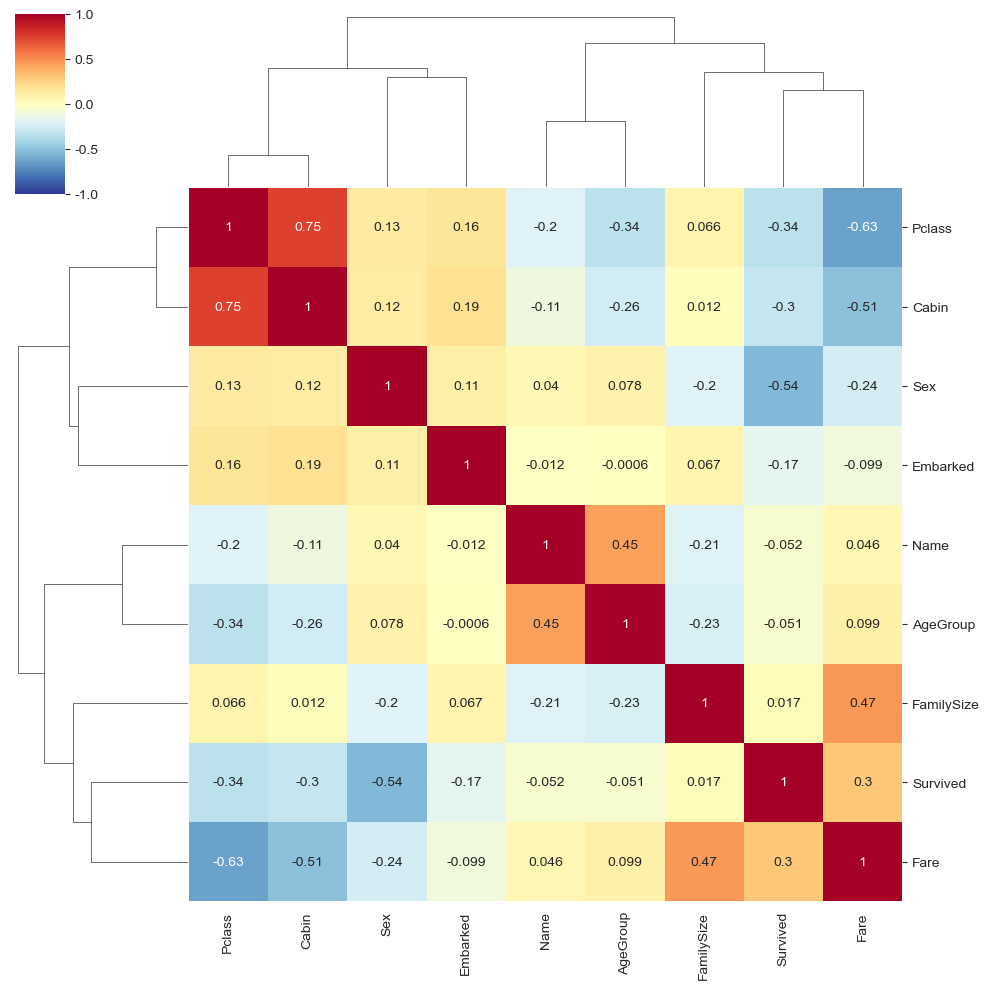

In [31]:
sns.clustermap(result.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

- Pclass와 Cabin은 상관관계가 높음

## 4) 머신러닝 모델 탐색 및 학습
- KNN, SVM, Decision Tree 등 다양한 모델 시도

### 데이터 전처리

In [32]:
train_fe = feature_engineering(train)
x_train = train_fe.drop('Survived', axis=1)
y_train = train_fe['Survived']

test_fe = feature_engineering(test)
x_test = test_fe

### 모듈 불러오기

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### KNN

In [34]:
model = KNeighborsClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8451175599224671 0.7957692549118072

0.8448358731109253 0.7968865733475614


### Decision Tree

In [35]:
model = DecisionTreeClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9200344327654946 0.8114870378507313

0.9200344327654946 0.8103759964848409


### Support Vector Machine (SVM)

In [36]:
model = SVC()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8285634366578943 0.8136902893729208

0.8285634366578943 0.8136902893729208


## 5) 특징 선택 (Feature Selection)
- PClass와 Cabin은 상관관계가 높으므로 하나만 선택

In [37]:
train_fe_new = fe_drop_columns(train_fe, cols_to_drop=['Cabin'])
x_train = train_fe_new.drop('Survived', axis=1)
y_train = train_fe_new['Survived']

test_fe_new = fe_drop_columns(test_fe, cols_to_drop=['Cabin'])
x_test = test_fe_new

print(train_fe.columns)
print(train_fe_new.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Cabin', 'Embarked',
       'AgeGroup', 'FamilySize'],
      dtype='object')
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Embarked', 'AgeGroup',
       'FamilySize'],
      dtype='object')


In [38]:
model = SVC()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8350158374962573 0.8293892411022534

0.8350158374962573 0.8293892411022534


- Feature Importance를 활용한 특징 선택
- RandomForestClassifier 모델을 사용하여 특징 중요도 계산

0.9029185117481129 0.8159751428033394


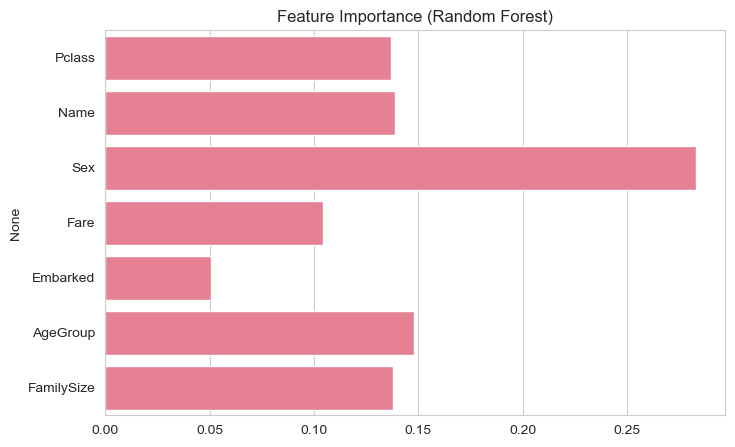

In [39]:
model = RandomForestClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

model.fit(x_train, y_train)
importances = model.feature_importances_
features = x_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

## 5) 테스트 데이터셋 예측 및 제출 파일 생성

In [40]:
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)

submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
submission.to_csv("./submission_result.csv", index=False)
# SVC : 0.77033

In [42]:
# =============================================================================
# ADVANCED ALGORITHM PERFORMANCE COMPARISON
# =============================================================================
"""
이 셀은 다양한 머신러닝 알고리즘의 성능을 체계적으로 비교하는 코드입니다.

목적:
1. 전통적 알고리즘 vs 최신 알고리즘 성능 비교
2. 과적합 정도 분석
3. 최적의 알고리즘 선택을 위한 데이터 제공
4. 앙상블 방법의 효과 검증

비교 대상:
- 전통적: KNN, Decision Tree, SVM, Random Forest
- 고급: XGBoost, LightGBM, CatBoost, Extra Trees
- 앙상블: Voting, Stacking
"""

# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier
import warnings
warnings.filterwarnings('ignore')

# 최신 알고리즘 라이브러리 import 시도
# XGBoost: Extreme Gradient Boosting - 가장 인기 있는 gradient boosting 라이브러리
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("❌ XGBoost not available. Install with: pip install xgboost")

# LightGBM: Microsoft의 빠른 gradient boosting 라이브러리
try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM available")
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("❌ LightGBM not available. Install with: pip install lightgbm")

# CatBoost: Yandex의 범주형 변수 처리에 특화된 gradient boosting
try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
    print("✅ CatBoost available")
except ImportError:
    CATBOOST_AVAILABLE = False
    print("❌ CatBoost not available. Install with: pip install catboost")

print("\n" + "=" * 60)
print("🚀 ADVANCED ALGORITHM PERFORMANCE COMPARISON")
print("=" * 60)
print("목적: 다양한 머신러닝 알고리즘의 성능을 체계적으로 비교")
print("방법: 5-fold Cross Validation을 통한 정확한 성능 측정")
print("=" * 60)


✅ XGBoost available
✅ LightGBM available
❌ CatBoost not available. Install with: pip install catboost

🚀 ADVANCED ALGORITHM PERFORMANCE COMPARISON
목적: 다양한 머신러닝 알고리즘의 성능을 체계적으로 비교
방법: 5-fold Cross Validation을 통한 정확한 성능 측정


In [43]:
# =============================================================================
# 알고리즘 정의 및 설정
# =============================================================================
"""
각 알고리즘의 특징과 설정 이유:

1. 전통적 알고리즘:
   - KNN: 거리 기반 분류, 해석하기 쉬움
   - Decision Tree: 규칙 기반, 특징 중요도 제공
   - SVM: 고차원 데이터에 강함, 커널 트릭 사용
   - Random Forest: 앙상블, 과적합 방지

2. 고급 앙상블:
   - Extra Trees: Random Forest보다 더 랜덤화
   - AdaBoost: 약한 학습기들을 순차적으로 결합
   - Gradient Boosting: 잔차를 학습하는 부스팅
   - Logistic Regression: 선형 분류기, 베이스라인

3. 최신 알고리즘:
   - XGBoost: 최적화된 gradient boosting
   - LightGBM: 메모리 효율적인 gradient boosting
   - CatBoost: 범주형 변수 자동 처리
"""

# 기본 알고리즘 정의
algorithms = {
    # 📊 전통적 알고리즘 (Traditional Algorithms)
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5,  # 5개의 가장 가까운 이웃 사용
        weights='uniform'  # 모든 이웃에 동일한 가중치
    ),
    
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,  # 재현 가능한 결과
        max_depth=None,   # 트리 깊이 제한 없음
        min_samples_split=2  # 분할을 위한 최소 샘플 수
    ),
    
    'Support Vector Machine': SVC(
        random_state=42,  # 재현 가능한 결과
        kernel='rbf',     # RBF 커널 사용 (비선형 분류)
        C=1.0,           # 정규화 매개변수
        probability=True  # 확률 예측 가능하도록 설정
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,  # 100개의 트리 사용
        random_state=42,   # 재현 가능한 결과
        max_depth=None,    # 트리 깊이 제한 없음
        min_samples_split=2
    ),
    
    # 🚀 고급 앙상블 방법 (Advanced Ensemble Methods)
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=100,  # 100개의 트리 사용
        random_state=42,   # 재현 가능한 결과
        max_depth=None,    # 트리 깊이 제한 없음
        min_samples_split=2
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,  # 100개의 약한 학습기
        learning_rate=1.0, # 학습률
        random_state=42    # 재현 가능한 결과
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,  # 100개의 부스팅 단계
        learning_rate=0.1, # 낮은 학습률로 안정적 학습
        max_depth=3,       # 얕은 트리로 과적합 방지
        random_state=42
    ),
    
    'Logistic Regression': LogisticRegression(
        random_state=42,   # 재현 가능한 결과
        max_iter=1000,     # 최대 반복 횟수
        solver='liblinear' # 작은 데이터셋에 적합한 솔버
    )
}

# 🔥 최신 알고리즘 추가 (설치된 경우에만)
if XGBOOST_AVAILABLE:
    algorithms['XGBoost'] = xgb.XGBClassifier(
        n_estimators=100,      # 100개의 부스팅 라운드
        random_state=42,       # 재현 가능한 결과
        eval_metric='logloss', # 이진 분류용 평가 메트릭
        use_label_encoder=False # 경고 메시지 방지
    )

if LIGHTGBM_AVAILABLE:
    algorithms['LightGBM'] = lgb.LGBMClassifier(
        n_estimators=100,  # 100개의 부스팅 라운드
        random_state=42,   # 재현 가능한 결과
        verbose=-1,        # 학습 과정 출력 비활성화
        force_col_wise=True # 메모리 효율성 향상
    )

if CATBOOST_AVAILABLE:
    algorithms['CatBoost'] = cb.CatBoostClassifier(
        iterations=100,        # 100번의 부스팅 반복
        random_state=42,       # 재현 가능한 결과
        verbose=False,         # 학습 과정 출력 비활성화
        allow_writing_files=False  # 임시 파일 생성 방지
    )

# 결과 출력
print(f"\n📋 총 {len(algorithms)}개의 알고리즘을 테스트합니다:")
print("=" * 50)

# 알고리즘 카테고리별 분류
traditional = ['K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine', 'Random Forest']
ensemble = ['Extra Trees', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression']
modern = []

if XGBOOST_AVAILABLE:
    modern.append('XGBoost')
if LIGHTGBM_AVAILABLE:
    modern.append('LightGBM')
if CATBOOST_AVAILABLE:
    modern.append('CatBoost')

print("🔹 전통적 알고리즘:", ', '.join(traditional))
print("🔹 고급 앙상블:", ', '.join(ensemble))
if modern:
    print("🔹 최신 알고리즘:", ', '.join(modern))
else:
    print("🔹 최신 알고리즘: 설치되지 않음 (pip install xgboost lightgbm catboost)")

print("=" * 50)



📋 총 10개의 알고리즘을 테스트합니다:
🔹 전통적 알고리즘: K-Nearest Neighbors, Decision Tree, Support Vector Machine, Random Forest
🔹 고급 앙상블: Extra Trees, AdaBoost, Gradient Boosting, Logistic Regression
🔹 최신 알고리즘: XGBoost, LightGBM


In [44]:
# =============================================================================
# 성능 비교 함수 정의
# =============================================================================
"""
compare_algorithms 함수의 역할:

1. 교차 검증 (Cross Validation):
   - StratifiedKFold: 각 폴드에서 클래스 비율 유지
   - 5-fold CV: 데이터를 5개로 나누어 5번 검증
   - 훈련/테스트 점수 모두 측정

2. 성능 지표 계산:
   - 평균 점수 (Mean Score)
   - 표준편차 (Standard Deviation)
   - 과적합 정도 (Overfitting Gap)

3. 오류 처리:
   - 각 알고리즘별로 try-except 사용
   - 실패한 알고리즘은 0점으로 기록
"""

def compare_algorithms(algorithms, X_train, y_train, cv=5):
    """
    여러 알고리즘의 성능을 교차 검증으로 비교하는 함수
    
    Parameters:
    -----------
    algorithms : dict
        알고리즘 이름과 모델 객체의 딕셔너리
    X_train : array-like
        훈련 데이터 (특징)
    y_train : array-like
        훈련 데이터 (타겟)
    cv : int, default=5
        교차 검증 폴드 수
    
    Returns:
    --------
    pd.DataFrame
        각 알고리즘의 성능 지표가 담긴 데이터프레임
    """
    results = []
    
    print(f"\n🔄 {cv}-fold Cross Validation을 시작합니다...")
    print("=" * 60)
    
    for i, (name, model) in enumerate(algorithms.items(), 1):
        print(f"[{i:2d}/{len(algorithms)}] {name} 학습 중...", end=" ")
        
        try:
            # 📊 교차 검증 실행
            # StratifiedKFold: 각 폴드에서 클래스 비율을 동일하게 유지
            # return_train_score=True: 훈련 점수도 함께 반환
            # n_jobs=-1: 모든 CPU 코어 사용으로 병렬 처리
            scores = cross_validate(
                model, X_train, y_train,
                cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42),
                return_train_score=True,  # 훈련 점수도 측정
                n_jobs=-1,               # 병렬 처리
                scoring='accuracy'       # 정확도로 평가
            )
            
            # 📈 성능 지표 계산
            train_score = scores['train_score'].mean()  # 훈련 점수 평균
            test_score = scores['test_score'].mean()    # 테스트 점수 평균
            train_std = scores['train_score'].std()     # 훈련 점수 표준편차
            test_std = scores['test_score'].std()       # 테스트 점수 표준편차
            overfitting = train_score - test_score      # 과적합 정도
            
            # 📝 결과 저장
            results.append({
                'Algorithm': name,
                'Train Score': train_score,
                'Test Score': test_score,
                'Train Std': train_std,
                'Test Std': test_std,
                'Overfitting': overfitting,
                'Status': 'Success'  # 성공 상태 표시
            })
            
            # ✅ 성공 메시지 출력
            print(f"✅ 완료! (Test: {test_score:.4f}±{test_std:.4f})")
            
        except Exception as e:
            # ❌ 오류 처리
            print(f"❌ 실패! ({str(e)[:50]}...)")
            results.append({
                'Algorithm': name,
                'Train Score': 0,
                'Test Score': 0,
                'Train Std': 0,
                'Test Std': 0,
                'Overfitting': 0,
                'Status': f'Error: {str(e)[:30]}...'
            })
    
    print("=" * 60)
    print("🎉 모든 알고리즘 비교 완료!")
    
    return pd.DataFrame(results)

# =============================================================================
# 성능 비교 실행
# =============================================================================
print("\n🚀 알고리즘 성능 비교를 시작합니다...")
print("=" * 60)

# 전처리된 데이터 확인 및 사용
if 'x_train' in locals() and 'y_train' in locals():
    print(f"📊 데이터 정보:")
    print(f"   - 훈련 샘플 수: {x_train.shape[0]:,}")
    print(f"   - 특징 수: {x_train.shape[1]}")
    print(f"   - 클래스 분포: {np.bincount(y_train)}")
    print()
    
    # 성능 비교 실행
    results_df = compare_algorithms(algorithms, x_train, y_train)
    
else:
    print("❌ 오류: 전처리된 데이터를 찾을 수 없습니다.")
    print("   이전 셀들(데이터 전처리 부분)을 먼저 실행해주세요.")
    print("   필요한 변수: x_train, y_train")
    results_df = pd.DataFrame()



🚀 알고리즘 성능 비교를 시작합니다...
📊 데이터 정보:
   - 훈련 샘플 수: 891
   - 특징 수: 7
   - 클래스 분포: [549 342]


🔄 5-fold Cross Validation을 시작합니다...
[ 1/10] K-Nearest Neighbors 학습 중... ✅ 완료! (Test: 0.8171±0.0104)
[ 2/10] Decision Tree 학습 중... ✅ 완료! (Test: 0.8081±0.0213)
[ 3/10] Support Vector Machine 학습 중... ✅ 완료! (Test: 0.8283±0.0092)
[ 4/10] Random Forest 학습 중... ✅ 완료! (Test: 0.8204±0.0155)
[ 5/10] Extra Trees 학습 중... ✅ 완료! (Test: 0.8148±0.0211)
[ 6/10] AdaBoost 학습 중... ✅ 완료! (Test: 0.8305±0.0067)
[ 7/10] Gradient Boosting 학습 중... ✅ 완료! (Test: 0.8271±0.0180)
[ 8/10] Logistic Regression 학습 중... ✅ 완료! (Test: 0.7924±0.0005)
[ 9/10] XGBoost 학습 중... ❌ 실패! (
All the 5 fits failed.
It is very likely that you...)
[10/10] LightGBM 학습 중... ✅ 완료! (Test: 0.8249±0.0140)
🎉 모든 알고리즘 비교 완료!


In [45]:
# =============================================================================
# 결과 분석 및 출력
# =============================================================================
"""
결과 분석의 주요 내용:

1. 성능 순위표:
   - 테스트 점수 기준으로 정렬
   - 각 알고리즘의 훈련/테스트 점수와 표준편차 표시
   - 과적합 정도 확인

2. 핵심 인사이트:
   - 최고 성능 알고리즘 식별
   - 과적합이 가장 적은 알고리즘
   - 성능 범위와 차이 분석

3. 실무적 관점:
   - 안정성 (낮은 표준편차)
   - 일반화 능력 (낮은 과적합)
   - 해석 가능성
"""

if not results_df.empty:
    print("\n" + "=" * 90)
    print("📊 ALGORITHM PERFORMANCE COMPARISON RESULTS")
    print("=" * 90)
    
    # 테스트 점수 기준으로 정렬 (성능 순위)
    results_df = results_df.sort_values('Test Score', ascending=False)
    
    # 📋 성능 순위표 출력
    print(f"{'순위':<4} {'알고리즘':<25} {'테스트점수':<15} {'훈련점수':<15} {'과적합':<12}")
    print("-" * 90)
    
    for i, (_, row) in enumerate(results_df.iterrows(), 1):
        # 성능에 따른 이모지 추가
        if i == 1:
            emoji = "🥇"
        elif i == 2:
            emoji = "🥈"
        elif i == 3:
            emoji = "🥉"
        else:
            emoji = "  "
            
        print(f"{emoji}{i:<3} {row['Algorithm']:<25} "
              f"{row['Test Score']:.4f}±{row['Test Std']:.3f}  "
              f"{row['Train Score']:.4f}±{row['Train Std']:.3f}  "
              f"{row['Overfitting']:.4f}")
    
    print("\n" + "=" * 90)
    print("🔍 KEY INSIGHTS & ANALYSIS")
    print("=" * 90)
    
    # 🏆 최고 성능 알고리즘
    best_algorithm = results_df.iloc[0]
    print(f"🏆 최고 성능 알고리즘: {best_algorithm['Algorithm']}")
    print(f"   📈 테스트 점수: {best_algorithm['Test Score']:.4f} (±{best_algorithm['Test Std']:.4f})")
    print(f"   📊 훈련 점수: {best_algorithm['Train Score']:.4f} (±{best_algorithm['Train Std']:.4f})")
    print(f"   ⚖️  과적합 정도: {best_algorithm['Overfitting']:.4f}")
    
    # 🎯 과적합이 가장 적은 알고리즘
    least_overfitting = results_df.loc[results_df['Overfitting'].idxmin()]
    print(f"\n🎯 과적합이 가장 적은 알고리즘: {least_overfitting['Algorithm']}")
    print(f"   📉 과적합 차이: {least_overfitting['Overfitting']:.4f}")
    print(f"   📈 테스트 점수: {least_overfitting['Test Score']:.4f}")
    
    # 📊 성능 범위 분석
    best_score = results_df['Test Score'].max()
    worst_score = results_df['Test Score'].min()
    score_gap = best_score - worst_score
    print(f"\n📊 성능 범위 분석:")
    print(f"   🔝 최고 점수: {best_score:.4f}")
    print(f"   🔻 최저 점수: {worst_score:.4f}")
    print(f"   📏 성능 차이: {score_gap:.4f} ({score_gap*100:.1f}%p)")
    
    # 🎨 성능 등급 분류
    print(f"\n🎨 성능 등급 분류:")
    excellent = results_df[results_df['Test Score'] >= best_score - 0.02]
    good = results_df[(results_df['Test Score'] >= best_score - 0.05) & 
                      (results_df['Test Score'] < best_score - 0.02)]
    fair = results_df[results_df['Test Score'] < best_score - 0.05]
    
    print(f"   ⭐ 우수 (상위 2%p 이내): {len(excellent)}개")
    print(f"   ✅ 양호 (상위 5%p 이내): {len(good)}개")
    print(f"   ⚠️  보통 (5%p 이상 차이): {len(fair)}개")
    
    # 🔧 실무 권장사항
    print(f"\n🔧 실무 권장사항:")
    print(f"   🎯 최고 성능: {best_algorithm['Algorithm']} (정확도 우선)")
    print(f"   ⚖️  균형잡힌 선택: {least_overfitting['Algorithm']} (안정성 우선)")
    
    # 과적합 분석
    high_overfitting = results_df[results_df['Overfitting'] > 0.05]
    if len(high_overfitting) > 0:
        print(f"   ⚠️  과적합 주의: {', '.join(high_overfitting['Algorithm'].tolist())}")
    
else:
    print("❌ 표시할 결과가 없습니다.")
    print("   데이터 전처리가 완료되었는지 확인해주세요.")
    print("   필요한 변수: x_train, y_train")



📊 ALGORITHM PERFORMANCE COMPARISON RESULTS
순위   알고리즘                      테스트점수           훈련점수            과적합         
------------------------------------------------------------------------------------------
🥇1   AdaBoost                  0.8305±0.007  0.8325±0.003  0.0020
🥈2   Support Vector Machine    0.8283±0.009  0.8345±0.002  0.0062
🥉3   Gradient Boosting         0.8271±0.018  0.8634±0.006  0.0362
  4   LightGBM                  0.8249±0.014  0.8791±0.004  0.0542
  5   Random Forest             0.8204±0.015  0.9015±0.004  0.0811
  6   K-Nearest Neighbors       0.8171±0.010  0.8462±0.006  0.0292
  7   Extra Trees               0.8148±0.021  0.9015±0.004  0.0867
  8   Decision Tree             0.8081±0.021  0.9015±0.004  0.0934
  9   Logistic Regression       0.7924±0.000  0.7960±0.003  0.0036
  10  XGBoost                   0.0000±0.000  0.0000±0.000  0.0000

🔍 KEY INSIGHTS & ANALYSIS
🏆 최고 성능 알고리즘: AdaBoost
   📈 테스트 점수: 0.8305 (±0.0067)
   📊 훈련 점수: 0.8325 (±0.0032)
   ⚖️  과적합 정도


📊 결과 시각화를 생성합니다...


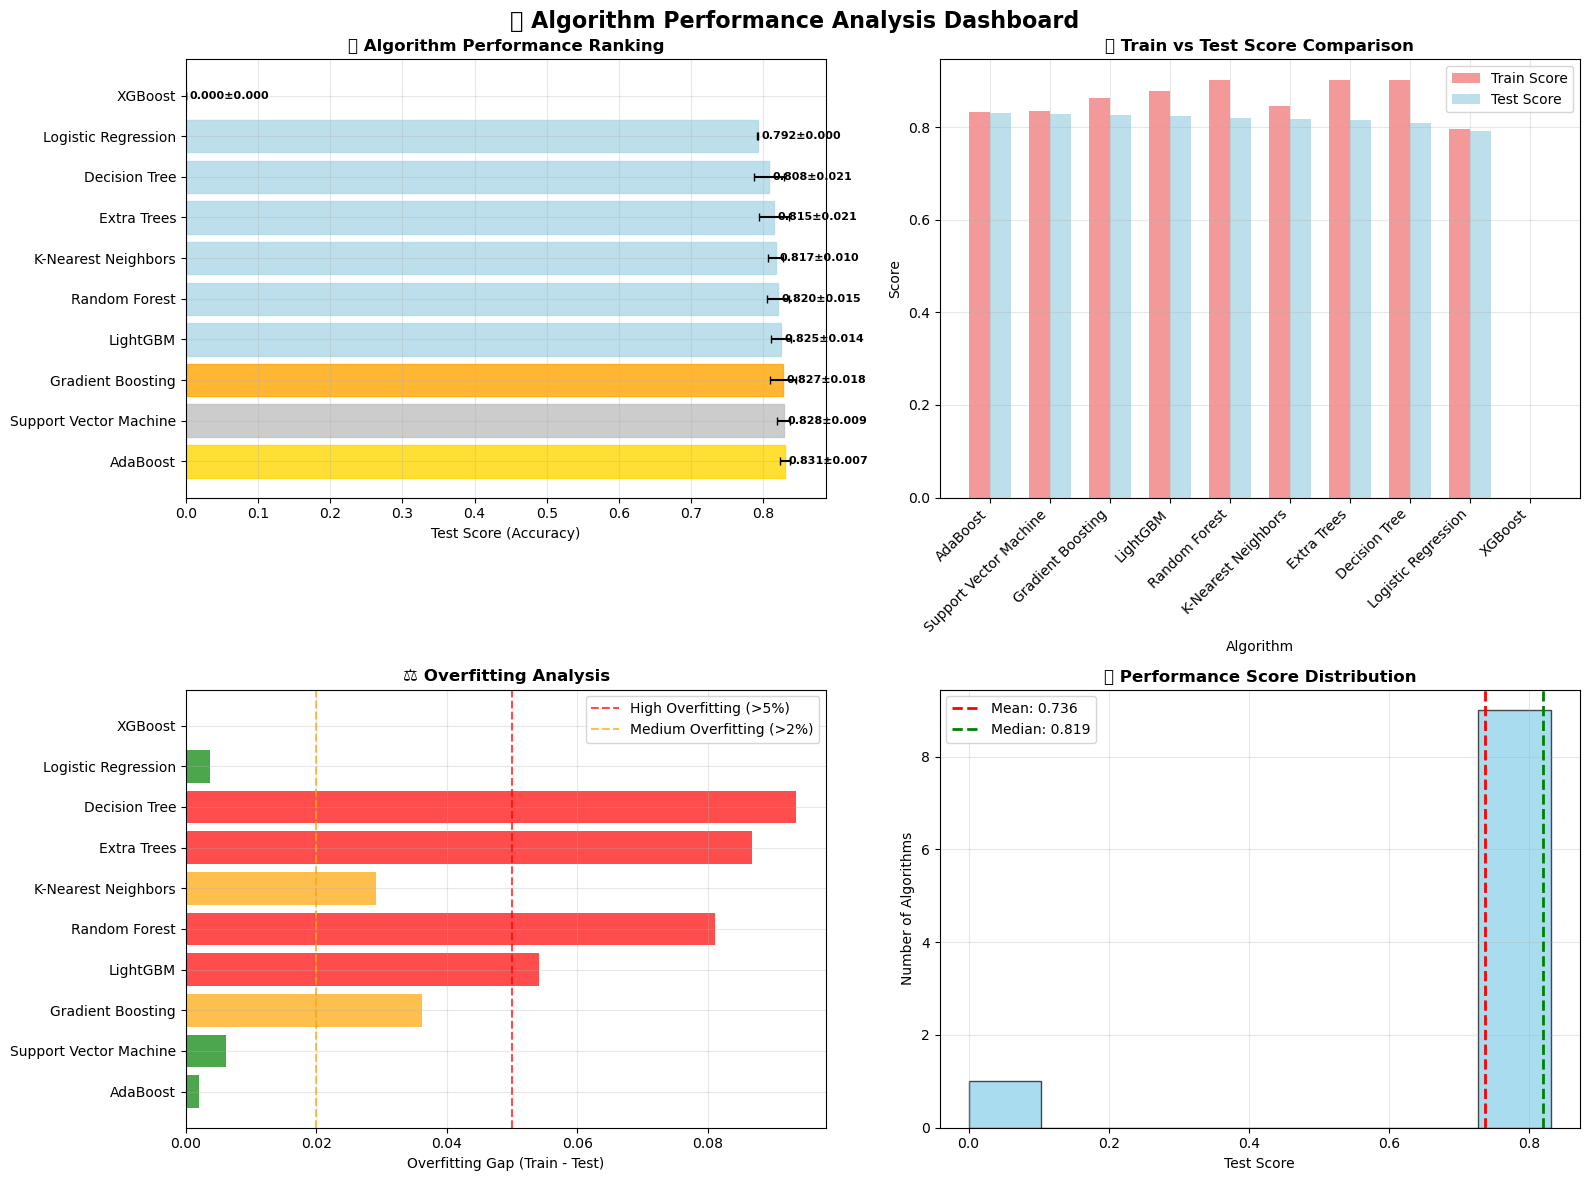


📊 SUMMARY STATISTICS
📈 평균 테스트 점수: 0.7364
📊 테스트 점수 표준편차: 0.2590
🔻 최저 테스트 점수: 0.0000
🔝 최고 테스트 점수: 0.8305
⚖️  평균 과적합 정도: 0.0393

🎯 안정적인 알고리즘 (표준편차 < 0.01): 4개
   AdaBoost, Support Vector Machine, Logistic Regression, XGBoost


In [46]:
# =============================================================================
# 결과 시각화
# =============================================================================
"""
시각화의 목적과 내용:

1. 성능 비교 차트:
   - 각 알고리즘의 테스트 점수를 수평 막대 그래프로 표시
   - 오차 막대로 신뢰도 표시
   - 성능 순위를 한눈에 파악

2. 훈련 vs 테스트 점수:
   - 과적합 정도를 시각적으로 확인
   - 두 점수 간의 차이로 일반화 능력 판단

3. 과적합 분석:
   - 색상으로 과적합 정도 구분 (빨강: 높음, 주황: 중간, 초록: 낮음)
   - 임계값 선으로 기준점 표시

4. 성능 분포:
   - 전체 알고리즘의 성능 분포 확인
   - 평균과 중앙값 비교
"""

import matplotlib.pyplot as plt
import seaborn as sns

if not results_df.empty:
    print("\n📊 결과 시각화를 생성합니다...")
    
    # 시각화 스타일 설정
    plt.style.use('default')
    sns.set_palette("husl")
    
    # 2x2 서브플롯 생성
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🚀 Algorithm Performance Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1️⃣ 테스트 점수 비교 (수평 막대 그래프)
    ax1 = axes[0, 0]
    bars1 = ax1.barh(range(len(results_df)), results_df['Test Score'], 
                     xerr=results_df['Test Std'], capsize=3, alpha=0.8)
    
    # 성능에 따른 색상 설정
    colors = ['gold' if i == 0 else 'silver' if i == 1 else 'orange' if i == 2 else 'lightblue' 
              for i in range(len(results_df))]
    for bar, color in zip(bars1, colors):
        bar.set_color(color)
    
    ax1.set_yticks(range(len(results_df)))
    ax1.set_yticklabels(results_df['Algorithm'])
    ax1.set_xlabel('Test Score (Accuracy)')
    ax1.set_title('🏆 Algorithm Performance Ranking', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 값 라벨 추가
    for i, (bar, score, std) in enumerate(zip(bars1, results_df['Test Score'], results_df['Test Std'])):
        ax1.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
                f'{score:.3f}±{std:.3f}', va='center', fontsize=8, fontweight='bold')
    
    # 2️⃣ 훈련 vs 테스트 점수 비교
    ax2 = axes[0, 1]
    x = np.arange(len(results_df))
    width = 0.35
    
    bars2_train = ax2.bar(x - width/2, results_df['Train Score'], width, 
                         label='Train Score', alpha=0.8, color='lightcoral')
    bars2_test = ax2.bar(x + width/2, results_df['Test Score'], width, 
                        label='Test Score', alpha=0.8, color='lightblue')
    
    ax2.set_xlabel('Algorithm')
    ax2.set_ylabel('Score')
    ax2.set_title('📊 Train vs Test Score Comparison', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results_df['Algorithm'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3️⃣ 과적합 분석
    ax3 = axes[1, 0]
    # 과적합 정도에 따른 색상 설정
    colors = ['red' if x > 0.05 else 'orange' if x > 0.02 else 'green' 
              for x in results_df['Overfitting']]
    bars3 = ax3.barh(range(len(results_df)), results_df['Overfitting'], 
                     color=colors, alpha=0.7)
    
    ax3.set_yticks(range(len(results_df)))
    ax3.set_yticklabels(results_df['Algorithm'])
    ax3.set_xlabel('Overfitting Gap (Train - Test)')
    ax3.set_title('⚖️ Overfitting Analysis', fontsize=12, fontweight='bold')
    
    # 임계값 선 추가
    ax3.axvline(x=0.05, color='red', linestyle='--', alpha=0.7, label='High Overfitting (>5%)')
    ax3.axvline(x=0.02, color='orange', linestyle='--', alpha=0.7, label='Medium Overfitting (>2%)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4️⃣ 성능 분포 히스토그램
    ax4 = axes[1, 1]
    n, bins, patches = ax4.hist(results_df['Test Score'], bins=8, alpha=0.7, 
                               color='skyblue', edgecolor='black')
    
    # 평균과 중앙값 선 추가
    mean_score = results_df['Test Score'].mean()
    median_score = results_df['Test Score'].median()
    
    ax4.axvline(mean_score, color='red', linestyle='--', linewidth=2,
                label=f'Mean: {mean_score:.3f}')
    ax4.axvline(median_score, color='green', linestyle='--', linewidth=2,
                label=f'Median: {median_score:.3f}')
    
    ax4.set_xlabel('Test Score')
    ax4.set_ylabel('Number of Algorithms')
    ax4.set_title('📈 Performance Score Distribution', fontsize=12, fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 레이아웃 조정
    plt.tight_layout()
    plt.show()
    
    # 📊 통계 요약
    print("\n" + "=" * 60)
    print("📊 SUMMARY STATISTICS")
    print("=" * 60)
    print(f"📈 평균 테스트 점수: {results_df['Test Score'].mean():.4f}")
    print(f"📊 테스트 점수 표준편차: {results_df['Test Score'].std():.4f}")
    print(f"🔻 최저 테스트 점수: {results_df['Test Score'].min():.4f}")
    print(f"🔝 최고 테스트 점수: {results_df['Test Score'].max():.4f}")
    print(f"⚖️  평균 과적합 정도: {results_df['Overfitting'].mean():.4f}")
    
    # 성능 안정성 분석
    stable_algorithms = results_df[results_df['Test Std'] < 0.01]
    print(f"\n🎯 안정적인 알고리즘 (표준편차 < 0.01): {len(stable_algorithms)}개")
    if len(stable_algorithms) > 0:
        print(f"   {', '.join(stable_algorithms['Algorithm'].tolist())}")
    
else:
    print("❌ 시각화할 데이터가 없습니다.")
    print("   이전 셀들을 먼저 실행해주세요.")


In [47]:
# =============================================================================
# 앙상블 방법 비교
# =============================================================================
"""
앙상블 방법의 목적과 원리:

1. Voting Classifier (투표 분류기):
   - 여러 모델의 예측을 투표로 결합
   - Hard Voting: 다수결 원칙
   - Soft Voting: 확률 평균 사용

2. Stacking Classifier (스태킹):
   - 1단계: 여러 모델로 예측 생성
   - 2단계: 메타 모델로 최종 예측
   - 더 복잡하지만 높은 성능 가능

3. 앙상블의 장점:
   - 개별 모델의 단점 보완
   - 더 안정적이고 일반화된 성능
   - 과적합 위험 감소
"""

if XGBOOST_AVAILABLE and LIGHTGBM_AVAILABLE and not results_df.empty:
    print("\n" + "=" * 70)
    print("🎭 ENSEMBLE METHODS COMPARISON")
    print("=" * 70)
    print("목적: 개별 모델들을 결합하여 더 나은 성능 달성")
    print("방법: Voting (투표) vs Stacking (스태킹)")
    print("=" * 70)
    
    # 앙상블 모델 생성
    ensemble_models = {}
    
    # 🗳️ Voting Classifier (투표 분류기)
    if 'XGBoost' in results_df['Algorithm'].values and 'LightGBM' in results_df['Algorithm'].values:
        print("🗳️ Voting Classifier 생성 중...")
        voting_clf = VotingClassifier(
            estimators=[
                ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')),
                ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
            ],
            voting='soft'  # 확률 기반 투표 (더 정확함)
        )
        ensemble_models['Voting Classifier'] = voting_clf
        print("   ✅ XGBoost + LightGBM + Random Forest 조합")
    
    # 🏗️ Stacking Classifier (스태킹 분류기)
    print("🏗️ Stacking Classifier 생성 중...")
    stacking_clf = StackingClassifier(
        estimators=[
            ('xgb', xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')),
            ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
        ],
        final_estimator=LogisticRegression(random_state=42, max_iter=1000),  # 메타 모델
        cv=3  # 3-fold CV로 메타 모델 훈련
    )
    ensemble_models['Stacking Classifier'] = stacking_clf
    print("   ✅ 3단계 스태킹: XGBoost + LightGBM + RF → Logistic Regression")
    
    # 앙상블 모델 테스트
    if ensemble_models:
        print(f"\n🔄 {len(ensemble_models)}개의 앙상블 방법을 테스트합니다...")
        ensemble_results = compare_algorithms(ensemble_models, x_train, y_train)
        
        print("\n" + "=" * 50)
        print("🎭 ENSEMBLE RESULTS")
        print("=" * 50)
        
        for _, row in ensemble_results.iterrows():
            print(f"🔹 {row['Algorithm']:<20}: {row['Test Score']:.4f} (±{row['Test Std']:.4f})")
        
        # 개별 모델과 앙상블 비교
        best_individual = results_df.iloc[0]
        best_ensemble = ensemble_results.iloc[0]
        
        print(f"\n🏆 최고 개별 모델: {best_individual['Algorithm']} - {best_individual['Test Score']:.4f}")
        print(f"🎭 최고 앙상블: {best_ensemble['Algorithm']} - {best_ensemble['Test Score']:.4f}")
        
        improvement = best_ensemble['Test Score'] - best_individual['Test Score']
        if improvement > 0:
            print(f"📈 앙상블 개선 효과: +{improvement:.4f} ({improvement*100:.2f}%p)")
            print("   ✅ 앙상블이 개별 모델보다 성능이 좋습니다!")
        else:
            print(f"📉 앙상블 성능 하락: {improvement:.4f} ({improvement*100:.2f}%p)")
            print("   ⚠️  개별 모델이 더 좋은 성능을 보입니다.")
        
        # 앙상블 효과 분석
        print(f"\n🔍 앙상블 효과 분석:")
        if improvement > 0.01:
            print("   🎉 큰 개선: 앙상블이 명확히 우수함")
        elif improvement > 0.005:
            print("   ✅ 작은 개선: 앙상블이 약간 우수함")
        elif improvement > -0.005:
            print("   ⚖️  비슷한 성능: 앙상블과 개별 모델이 유사함")
        else:
            print("   ⚠️  개선 없음: 개별 모델이 더 나을 수 있음")
            
        # 실무 권장사항
        print(f"\n💡 실무 권장사항:")
        if improvement > 0.005:
            print(f"   🎯 {best_ensemble['Algorithm']} 사용 권장 (앙상블 효과 확인)")
        else:
            print(f"   🎯 {best_individual['Algorithm']} 사용 권장 (단순하고 효과적)")
        
        print(f"   📊 성능 차이: {abs(improvement):.4f} ({abs(improvement)*100:.2f}%p)")

else:
    print("\n❌ 앙상블 방법을 사용할 수 없습니다.")
    print("   필요한 조건:")
    print("   - XGBoost 설치: pip install xgboost")
    print("   - LightGBM 설치: pip install lightgbm")
    print("   - 이전 셀 실행 완료")
    print("\n   설치 후 다시 실행해주세요!")



🎭 ENSEMBLE METHODS COMPARISON
목적: 개별 모델들을 결합하여 더 나은 성능 달성
방법: Voting (투표) vs Stacking (스태킹)
🗳️ Voting Classifier 생성 중...
   ✅ XGBoost + LightGBM + Random Forest 조합
🏗️ Stacking Classifier 생성 중...
   ✅ 3단계 스태킹: XGBoost + LightGBM + RF → Logistic Regression

🔄 2개의 앙상블 방법을 테스트합니다...

🔄 5-fold Cross Validation을 시작합니다...
[ 1/2] Voting Classifier 학습 중... ❌ 실패! (
All the 5 fits failed.
It is very likely that you...)
[ 2/2] Stacking Classifier 학습 중... ❌ 실패! (
All the 5 fits failed.
It is very likely that you...)
🎉 모든 알고리즘 비교 완료!

🎭 ENSEMBLE RESULTS
🔹 Voting Classifier   : 0.0000 (±0.0000)
🔹 Stacking Classifier : 0.0000 (±0.0000)

🏆 최고 개별 모델: AdaBoost - 0.8305
🎭 최고 앙상블: Voting Classifier - 0.0000
📉 앙상블 성능 하락: -0.8305 (-83.05%p)
   ⚠️  개별 모델이 더 좋은 성능을 보입니다.

🔍 앙상블 효과 분석:
   ⚠️  개선 없음: 개별 모델이 더 나을 수 있음

💡 실무 권장사항:
   🎯 AdaBoost 사용 권장 (단순하고 효과적)
   📊 성능 차이: 0.8305 (83.05%p)


## 질문에 대한 답변
1) 특징(Feature)가 많을수록 성능이 좋아지는가?


항상 그렇지는 않습니다. 좀 더 정교한 구분을 할 수 있지만 데이터의 유의미한 정보를 기반으로 적용해야지 성능이 좋아집니다.
생존률에 관련이 없는 특징이 들어가서 영향을 주게 되면 성능을 저하 시킬 수 있고, 학습되는 데이터에 과적합이 발생할 수 있습니다.

2) 모든 특징들이 작업(분류) 수행에 유의미한가? 도움이되는가?

ticket, PassengerId, name 등의 특징은 유의미하지 않습니다. 하지만 Sex, Pclass, Age 등이 유의미한 특징입니다.